In [9]:
import pandas as pd
import numpy as np
import itertools
import psycopg2
import datetime as dt
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Compare number of invoices of two products

In [10]:
df_cmp_inv = pd.read_csv("./data_compare_products/compare_invoice_no_of_two_products.csv")
df_cmp_inv.columns.str.match('Unnamed')

df_cmp_inv = df_cmp_inv.loc[:, ~df_cmp_inv.columns.str.match('Unnamed')]
df_cmp_inv.head()

,customerid,B003ZDX2RW,B00503PKV6
0,12347,1.0,1.0
1,12355,1.0,0.0
2,12359,2.0,2.0
3,12362,0.0,2.0
4,12365,1.0,0.0


In [11]:
df_cmp_inv['class'] = (df_cmp_inv['B003ZDX2RW']*100/(df_cmp_inv['B003ZDX2RW'] + df_cmp_inv['B00503PKV6'])).astype(int)

In [12]:
# df_cmp_inv.to_csv("pe.csv")

In [13]:
df_cmp_inv = df_cmp_inv[(df_cmp_inv['B003ZDX2RW'] > 1) | (df_cmp_inv['B00503PKV6'] > 1)]
df_cmp_inv.head()

,customerid,B003ZDX2RW,B00503PKV6,class
2,12359,2.0,2.0,50
3,12362,0.0,2.0,0
7,12415,4.0,2.0,66
8,12417,0.0,3.0,0
15,12502,2.0,0.0,100


In [14]:
df_cmp_inv = df_cmp_inv.drop(df_cmp_inv[(df_cmp_inv['B003ZDX2RW'] < 0) | (df_cmp_inv['B00503PKV6'] < 0)].index)

In [15]:
df_cmp_inv.replace({'class' : range(20)}, 'A',inplace= True)
df_cmp_inv.replace({'class' : range(20,40)}, 'B', inplace= True)
df_cmp_inv.replace({'class' : range(40,60)}, 'C', inplace= True)
df_cmp_inv.replace({'class' : range(60,80)}, 'D', inplace= True)
df_cmp_inv.replace({'class' : range(80,101)}, 'E', inplace= True)

In [16]:
df_cmp_inv.head()

,customerid,B003ZDX2RW,B00503PKV6,class
2,12359,2.0,2.0,C
3,12362,0.0,2.0,A
7,12415,4.0,2.0,D
8,12417,0.0,3.0,A
15,12502,2.0,0.0,E


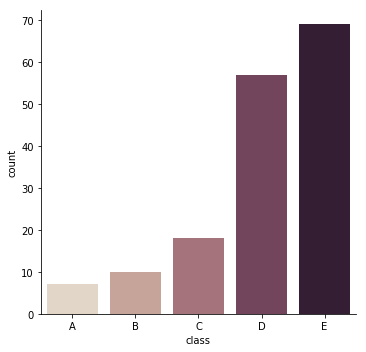

In [17]:
sns.catplot(x="class", kind="count", palette="ch:.25", data=df_cmp_inv.sort_values(by= 'class', ascending=True))
sns.despine()

In [18]:
df_cmp_inv.to_csv("compare_number_of_invoices_of_two_products.csv")

# Compare quantity of two products

In [20]:
df_cmp_quan = pd.read_csv("./data_compare_products/compare_quantity_of_two_products.csv")
df_cmp_quan.columns.str.match('Unnamed')

df_cmp_quan = df_cmp_quan.loc[:, ~df_cmp_quan.columns.str.match('Unnamed')]
df_cmp_quan.head()

,customerid,B003ZDX2RW,B00503PKV6
0,12347,12.0,12.0
1,12355,6.0,0.0
2,12359,12.0,24.0
3,12362,0.0,24.0
4,12365,6.0,0.0


In [21]:
df_cmp_quan = df_cmp_quan.drop(df_cmp_quan[(df_cmp_quan['B003ZDX2RW'] < 0) | (df_cmp_quan['B00503PKV6'] < 0)].index)

In [22]:
df_cmp_quan = df_cmp_quan[(df_cmp_quan['B003ZDX2RW'] > 1) | (df_cmp_quan['B00503PKV6'] > 1)]
df_cmp_quan['class'] = (df_cmp_quan['B003ZDX2RW']*100/(df_cmp_quan['B003ZDX2RW'] + df_cmp_quan['B00503PKV6'])).astype(int)
df_cmp_quan.head()

,customerid,B003ZDX2RW,B00503PKV6,class
0,12347,12.0,12.0,50
1,12355,6.0,0.0,100
2,12359,12.0,24.0,33
3,12362,0.0,24.0,0
4,12365,6.0,0.0,100


In [23]:
df_cmp_quan.replace({'class' : range(20)}, 'A',inplace= True)
df_cmp_quan.replace({'class' : range(20,40)}, 'B', inplace= True)
df_cmp_quan.replace({'class' : range(40,60)}, 'C', inplace= True)
df_cmp_quan.replace({'class' : range(60,80)}, 'D', inplace= True)
df_cmp_quan.replace({'class' : range(80,101)}, 'E', inplace= True)

In [24]:
df_cmp_quan.head()

,customerid,B003ZDX2RW,B00503PKV6,class
0,12347,12.0,12.0,C
1,12355,6.0,0.0,E
2,12359,12.0,24.0,B
3,12362,0.0,24.0,A
4,12365,6.0,0.0,E


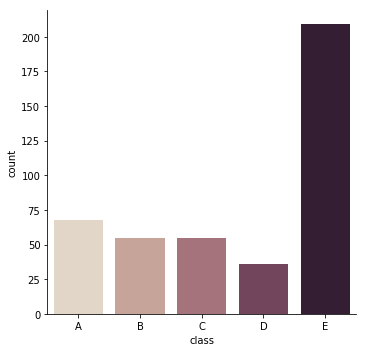

In [25]:
sns.catplot(x="class", kind="count", palette="ch:.25", data=df_cmp_quan.sort_values(by= 'class', ascending=True))
sns.despine()

In [26]:
df_cmp_quan.to_csv("compare_quantity_of_two_products.csv")

# Compare sales of two products

In [27]:
df_cmp_sales = pd.read_csv("./data_compare_products/compare_sales_of_two_products.csv")
df_cmp_sales.columns.str.match('Unnamed')

df_cmp_sales = df_cmp_sales.loc[:, ~df_cmp_sales.columns.str.match('Unnamed')]
df_cmp_sales.head()

,customerid,B003ZDX2RW,B00503PKV6
0,12347,111.19,89.21
1,12355,55.60,0.00
2,12359,111.20,178.42
3,12362,0.00,178.42
4,12365,55.60,0.00


In [28]:
df_cmp_sales = df_cmp_sales.drop(df_cmp_sales[(df_cmp_sales['B003ZDX2RW'] < 0) | (df_cmp_sales['B00503PKV6'] < 0)].index)

In [29]:
df_cmp_sales = df_cmp_sales[(df_cmp_sales['B003ZDX2RW'] > 1) | (df_cmp_sales['B00503PKV6'] > 1)]
df_cmp_sales['class'] = (df_cmp_sales['B003ZDX2RW']*100/(df_cmp_sales['B003ZDX2RW'] + df_cmp_sales['B00503PKV6'])).astype(int)

In [30]:
df_cmp_sales.replace({'class' : range(20)}, 'A',inplace= True)
df_cmp_sales.replace({'class' : range(20,40)}, 'B', inplace= True)
df_cmp_sales.replace({'class' : range(40,60)}, 'C', inplace= True)
df_cmp_sales.replace({'class' : range(60,80)}, 'D', inplace= True)
df_cmp_sales.replace({'class' : range(80,101)}, 'E', inplace= True)

In [31]:
df_cmp_sales.head()

,customerid,B003ZDX2RW,B00503PKV6,class
0,12347,111.19,89.21,C
1,12355,55.60,0.00,E
2,12359,111.20,178.42,B
3,12362,0.00,178.42,A
4,12365,55.60,0.00,E


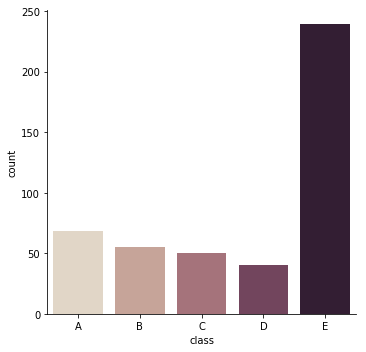

In [32]:
sns.catplot(x="class", kind="count", palette="ch:.25", data=df_cmp_sales.sort_values(by = 'class', ascending=True))
sns.despine()

In [33]:
df_cmp_sales.to_csv("compare_sales_of_two_products.csv")

# Number of invoices in last 3 months